In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/home/kevin/Downloads/titanic.csv')

 # Definitely drop

In [3]:
df = df.drop('PassengerId', axis=1)
df = df.loc[df['Embarked'].notna()]

 # Maybe drop


In [4]:
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [5]:
df.loc[df['Sex'] == 'female', 'Survived'].value_counts()

1    231
0     81
Name: Survived, dtype: int64

In [6]:
a = df.groupby(['Survived', 'Sex']).size().reset_index()

In [7]:
a

,Survived,Sex,0
0,0,female,81
1,0,male,468
2,1,female,231
3,1,male,109


In [8]:
a.pivot(index='Sex', columns='Survived', values=0)

Survived,0,1
Sex,,
female,81,231
male,468,109


In [9]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,231
male,468,109


In [10]:
embarked_encoding = df.groupby('Embarked')['Survived'].mean()

In [11]:
df['mean_embarked'] = df['Embarked'].apply(lambda x: embarked_encoding.loc[x])

In [12]:
embarked_class = {'Q': 0, 'S': 1, 'C': 2}

In [13]:
df['ordinal_embarked'] = df['Embarked'].apply(lambda x: embarked_class[x])

 # Drop after making 2 new features

In [14]:
df = df.drop('Embarked', axis=1)

/home/kevin/.local/share/virtualenvs/ds1.1-qN7bVCXO/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


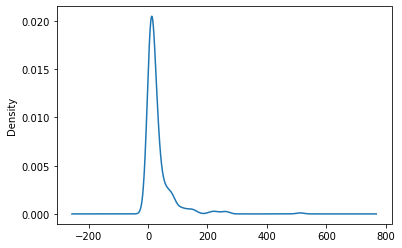

In [15]:
df['Fare'].plot('density')

In [16]:
df['Fare'] = pd.qcut(df['Fare'], 10, labels=False)

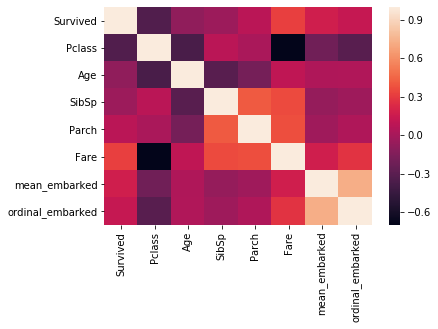

In [17]:
sns.heatmap(df.corr())

In [18]:
pclass_encoding = df.groupby('Pclass')['Survived'].mean()

In [19]:
df['Pclass'] = df['Pclass'].apply(lambda x: pclass_encoding.loc[x])

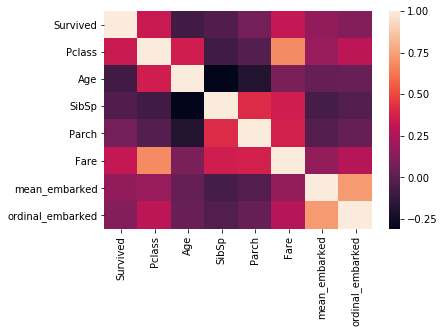

In [20]:
sns.heatmap(df.corr())

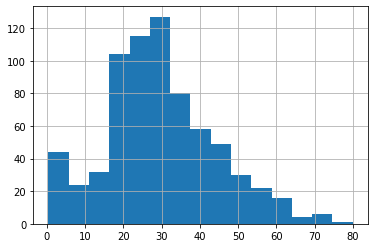

In [21]:
df['Age'].hist(bins=15)

In [8]:
df['binned_age'], bins = pd.qcut(df['Age'], 15, labels=False, retbins=True)
df.loc[df['binned_age'].isna(), 'binned_age'] = 15.0
df = df.drop('binned_age', axis=1)


In [26]:
mean_age = df.groupby('Age')['Survived'].mean().to_dict()
mean_nan = df.loc[df['Age'].isna(), 'Survived'].mean()

def get_mean_age(binned_age):
    if np.isnan(binned_age):
        return mean_nan
    
    return mean_age[binned_age]

In [9]:
def prepare_age(t_df):
    t_df['binned_age'] = pd.cut(t_df['Age'], bins=bins, labels=False, include_lowest=True)
    t_df.loc[t_df['binned_age'].isna(), 'binned_age'] = 15.0
    t_df = t_df.drop('binned_age', axis=1)


In [28]:
df['mean_age'] = df['Age'].apply(lambda x: get_mean_age(x))

In [29]:
df = df.drop('Age', axis=1)

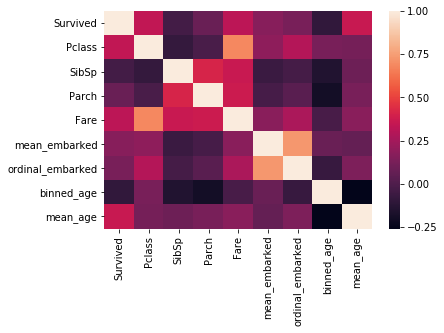

In [30]:
sns.heatmap(df.corr())

In [31]:
df['not_male'] = df['Sex'].apply(lambda x: int(x != 'male'))
df = df.drop('Sex', axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'])

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
test_df = pd.read_csv('/home/kevin/Downloads/test.csv')

In [43]:
test_df.drop()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
confusion_matrix(rf.predict(X_test), y_test)

array([[118,  23],
       [ 21,  61]])

In [ ]:
model predicted live, and they live | model predicted live and htey die
model predict die, and they live | model predict die, they die